In [3]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('Churn_Modelling.csv')

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.shape

(10000, 14)

count the number of rows and columns

In [15]:
print("Rows:",df.shape[0])
print("Columns:",df.shape[1])

Rows: 10000
Columns: 14


info about everything

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


checking the null values in our dataset

In [18]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Getting overall statistics

In [22]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Drop all irrelevant data

In [23]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Encode data categorically

In [30]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [32]:
df = pd.get_dummies(df,drop_first=True)

In [33]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [34]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [38]:
import seaborn as sns


<AxesSubplot:ylabel='count'>

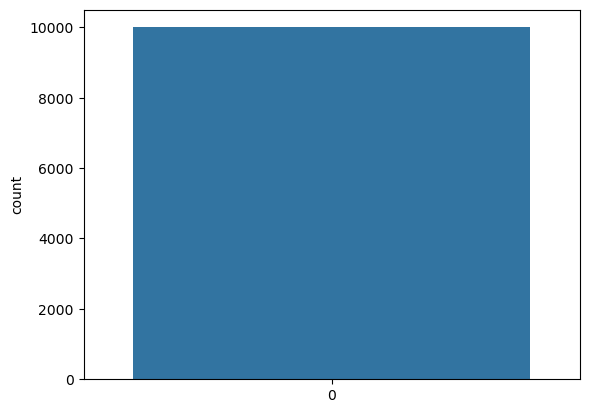

In [120]:
sns.countplot(df['Exited'])

In [46]:
X =df.drop('Exited', axis=1)
y =df['Exited']
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Split dataset to training set and test set

In [45]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

Feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [53]:
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [54]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

Logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [57]:
log = LogisticRegression()

In [58]:
log.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred1 = log.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,y_pred1)

0.809

In [73]:
accuracy_score(y_test,y_pred1)

0.809

In [63]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [64]:
precision_score(y_test,y_pred1)

0.5939849624060151

In [74]:
precision_score(y_test,y_pred1)

0.5939849624060151

In [65]:
recall_score(y_test,y_pred1)

0.1941031941031941

In [66]:
f1_score(y_test,y_pred1)

0.29259259259259257

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [72]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

SVC

In [75]:
from sklearn import svm

In [76]:
svm = svm.SVC()

In [78]:
svm.fit(X_train,y_train)

SVC()

In [80]:
y_pred2 = svm.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred2)

0.8625

In [83]:
precision_score(y_test,y_pred2)

0.8367346938775511

KNeighbors classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()

In [86]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [87]:
y_pred3 = knn.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred3)

0.824

In [89]:
precision_score(y_test,y_pred3)

0.6200873362445415

Decision Tree classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt = DecisionTreeClassifier()

In [92]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
y_pred4 = dt.predict(X_test)

In [94]:
accuracy_score(y_test,y_pred4)

0.7875

In [95]:
precision_score(y_test,y_pred4)

0.4799107142857143

Random forest classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier()

In [98]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [99]:
y_pred5 = rf.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred5)

0.8615

In [101]:
precision_score(y_test,y_pred5)

0.7663934426229508

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
gbc = GradientBoostingClassifier()

In [104]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [105]:
y_pred6 = gbc.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred6)

0.8685

In [107]:
precision_score(y_test,y_pred6)

0.7926829268292683

In [137]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                              accuracy_score(y_test,y_pred2),
                                                                              accuracy_score(y_test,y_pred3),
                                                                              accuracy_score(y_test,y_pred4),
                                                                              accuracy_score(y_test,y_pred5),
                                                                              accuracy_score(y_test,y_pred6),]})

In [138]:
final_data

,Models,ACC
0,LR,0.8090
1,SVC,0.8625
2,KNN,0.8240
3,DT,0.7875
4,RF,0.8615
5,GBC,0.8685


In [139]:
import seaborn as sns

In [140]:
sns.barplot(final_data['Models'], final_data['ACC'])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [141]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'PRE':[precision_score(y_test,y_pred1),
                                                                              precision_score(y_test,y_pred2),
                                                                              precision_score(y_test,y_pred3),
                                                                              precision_score(y_test,y_pred4),
                                                                              precision_score(y_test,y_pred5),
                                                                              precision_score(y_test,y_pred6),]})

In [142]:
final_data

,Models,PRE
0,LR,0.593985
1,SVC,0.836735
2,KNN,0.620087
3,DT,0.479911
4,RF,0.766393
5,GBC,0.792683


In [154]:
sns.barplot(final_data['Models'],final_data['PRE'])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

save the model

In [144]:
X_res = sc.fit_transform(X_res)

In [145]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [146]:
import joblib

In [148]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [149]:
model=joblib.load('churn_predict_model')

In [150]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [151]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])